In [ ]:
cancer prediction dataset

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [6]:
a=pd.read_csv(r'/content/archive (4).zip')
a

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [14]:
a.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [30]:
a.tail()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,...,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [31]:
a.describe

<bound method NDFrame.describe of       avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medincome  popest2015  povertypercent  studypercap           binnedinc  \
0         61898      

In [32]:
a.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [33]:
a.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [34]:
a['pctsomecol18_24'].value_counts()

43.0    10
42.1     8
42.3     8
45.5     7
36.6     7
        ..
72.7     1
53.2     1
46.5     1
24.8     1
43.9     1
Name: pctsomecol18_24, Length: 343, dtype: int64

In [35]:
a['pctemployed16_over'].value_counts()

51.9    20
48.9    20
57.9    20
54.2    19
59.7    19
        ..
34.3     1
73.6     1
32.8     1
35.1     1
68.6     1
Name: pctemployed16_over, Length: 409, dtype: int64

In [36]:
a['pctprivatecoveragealone'].value_counts()

53.0    16
53.8    14
50.6    14
51.7    14
49.6    14
        ..
24.5     1
71.1     1
24.4     1
71.3     1
15.7     1
Name: pctprivatecoveragealone, Length: 459, dtype: int64

In [16]:
a.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [15]:
# using get_dummies encoding technique

a1=pd.get_dummies(a[['geography','binnedinc']],drop_first=True)

In [19]:
a1

,"geography_Acadia Parish, Louisiana","geography_Accomack County, Virginia","geography_Ada County, Idaho","geography_Adair County, Iowa","geography_Adair County, Kentucky","geography_Adair County, Missouri","geography_Adair County, Oklahoma","geography_Adams County, Colorado","geography_Adams County, Idaho","geography_Adams County, Illinois",...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
a2=pd.concat([a,a1],axis=1)
a2

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,0,0,0,0,0,0,0,0,1,0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,0,0,0,0,0,1,0,0,0,0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,0,0,0,0,0,1,0,0,0,0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,0,0,0,1,0,0,0,0,0,0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,0,0,0,0,1,0,0,0,0,0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,0,0,0,0,0,1,0,0,0,0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,0,0,0,0,0,0,1,0,0,0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
a2.dtypes

avganncount                     float64
avgdeathsperyear                  int64
target_deathrate                float64
incidencerate                   float64
medincome                         int64
                                 ...   
binnedinc_(48021.6, 51046.4]      uint8
binnedinc_(51046.4, 54545.6]      uint8
binnedinc_(54545.6, 61494.5]      uint8
binnedinc_(61494.5, 125635]       uint8
binnedinc_[22640, 34218.1]        uint8
Length: 3088, dtype: object

In [22]:
# dropping 'geography' & 'binnedinc' from a2

a2=a2.drop(['geography','binnedinc'],axis=1)

In [18]:
a.columns


Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

<Axes: xlabel='birthrate', ylabel='Count'>

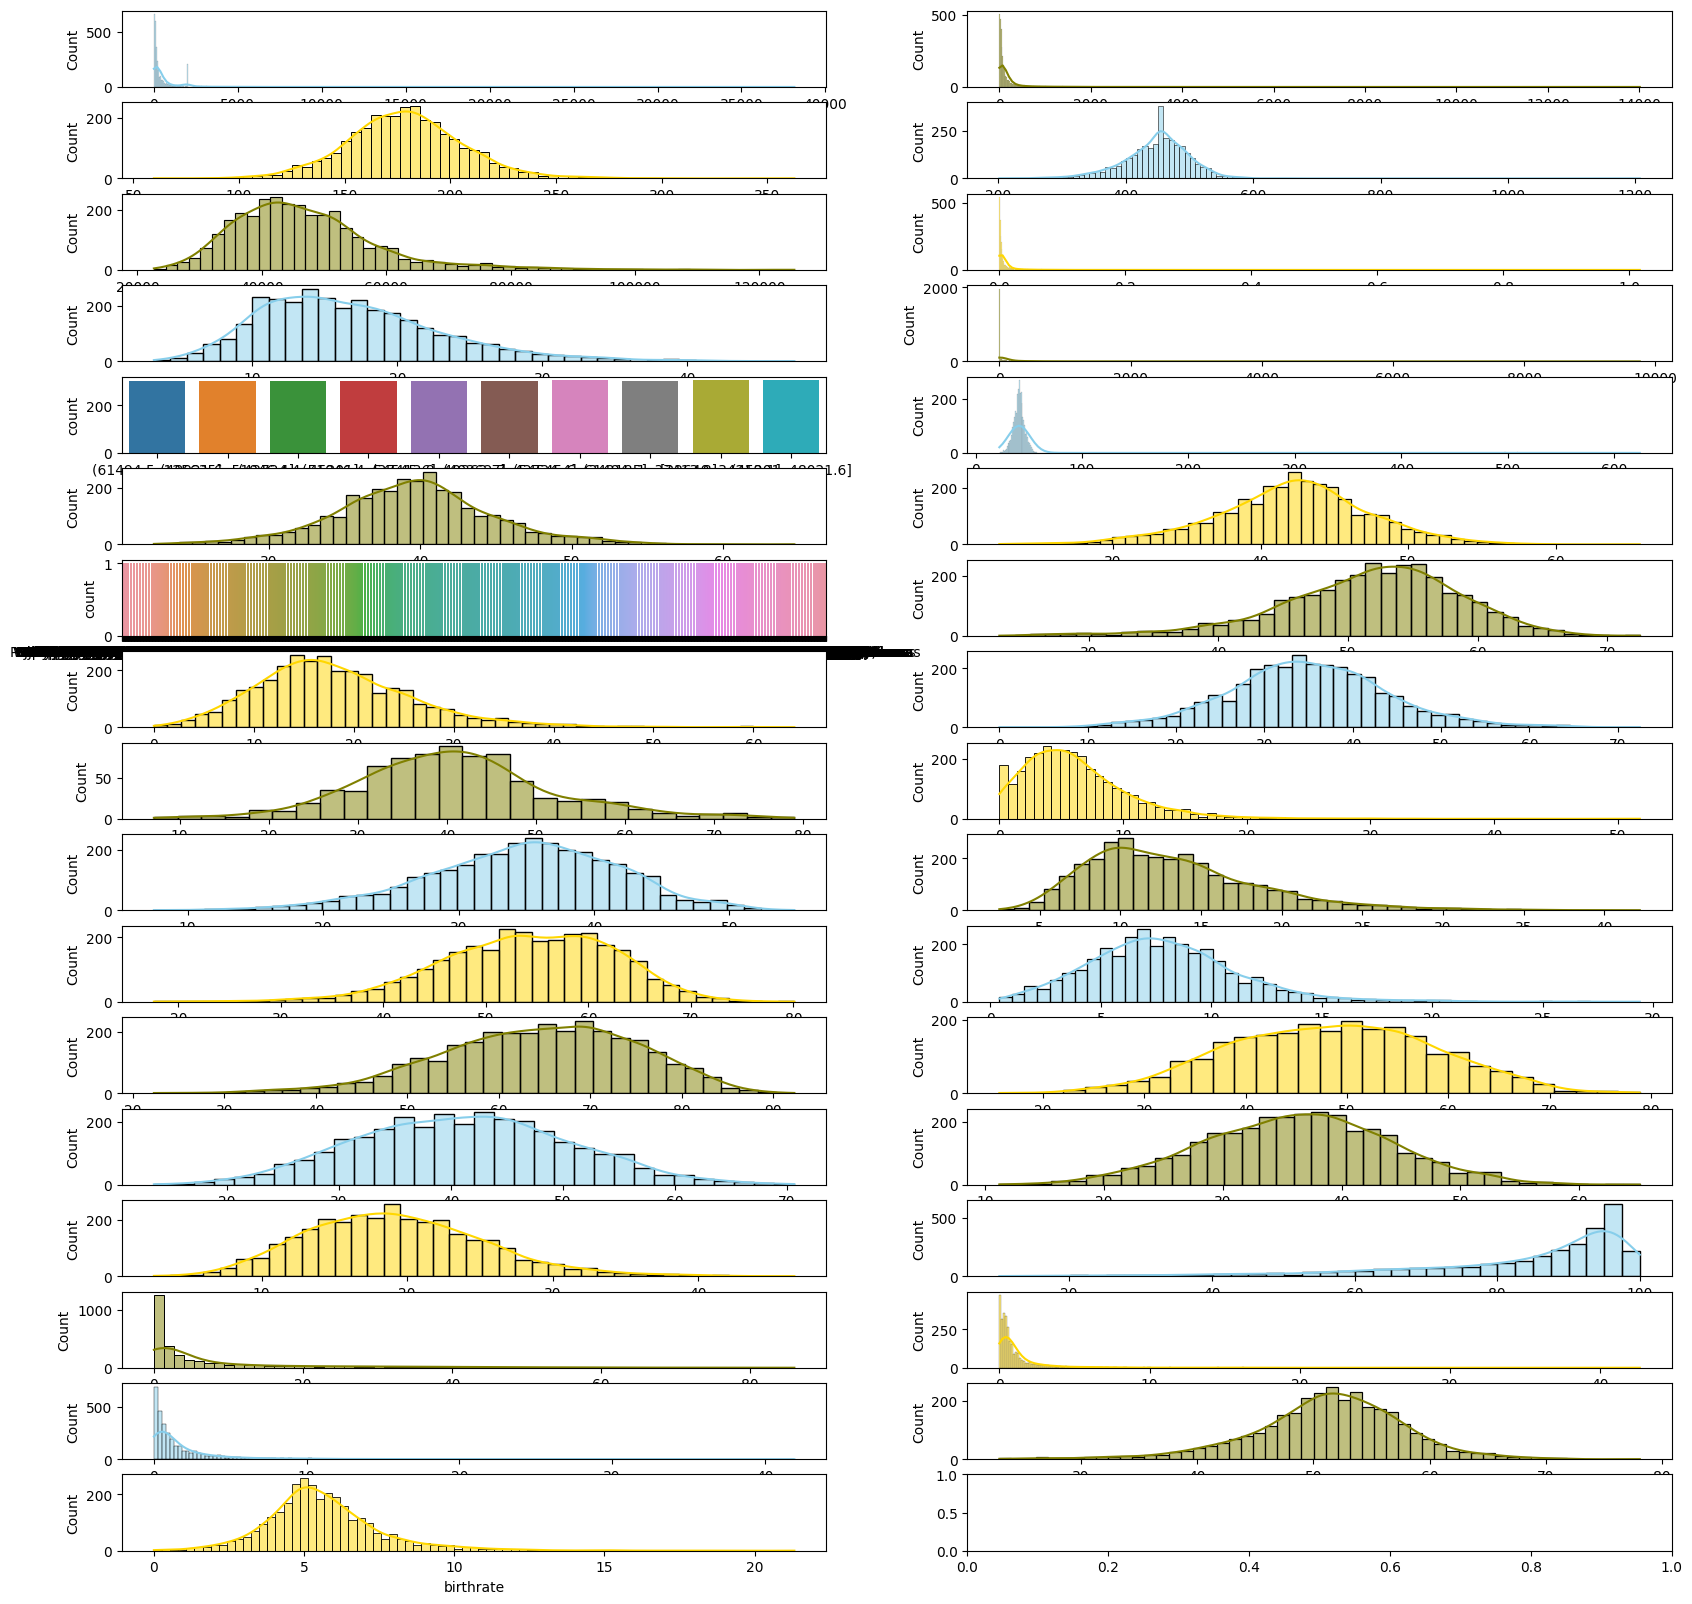

In [21]:
fig, axs = plt.subplots(17, 2, figsize=(20, 20))
sns.histplot(data=a["avganncount"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["avgdeathsperyear"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["target_deathrate"], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a["incidencerate"], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=a["medincome"], kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=a["popest2015"], kde=True, color="gold", ax=axs[2, 1])
sns.histplot(data=a["povertypercent"], kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=a["studypercap"], kde=True, color="olive", ax=axs[3, 1])
sns.countplot(x=a["binnedinc"], ax=axs[4, 0])
sns.histplot(data=a["medianage"], kde=True, color="skyblue", ax=axs[4, 1])
sns.histplot(data=a["medianagemale"], kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=a["medianagefemale"], kde=True, color="gold", ax=axs[5, 1])
sns.countplot(x=a["geography"], ax=axs[6, 0])
sns.histplot(data=a["percentmarried"], kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=a["pctnohs18_24"], kde=True, color="gold", ax=axs[7, 0])
sns.histplot(data=a["pcths18_24"], kde=True, color="skyblue", ax=axs[7, 1])
sns.histplot(data=a["pctsomecol18_24"], kde=True, color="olive", ax=axs[8, 0])
sns.histplot(data=a["pctbachdeg18_24"], kde=True, color="gold", ax=axs[8, 1])
sns.histplot(data=a["pcths25_over"], kde=True, color="skyblue", ax=axs[9, 0])
sns.histplot(data=a["pctbachdeg25_over"], kde=True, color="olive", ax=axs[9, 1])
sns.histplot(data=a["pctemployed16_over"], kde=True, color="gold", ax=axs[10, 0])
sns.histplot(data=a["pctunemployed16_over"], kde=True, color="skyblue", ax=axs[10, 1])
sns.histplot(data=a["pctprivatecoverage"], kde=True, color="olive", ax=axs[11, 0])
sns.histplot(data=a["pctprivatecoveragealone"], kde=True, color="gold", ax=axs[11, 1])
sns.histplot(data=a["pctempprivcoverage"], kde=True, color="skyblue", ax=axs[12, 0])
sns.histplot(data=a["pctpubliccoverage"], kde=True, color="olive", ax=axs[12, 1])
sns.histplot(data=a["pctpubliccoveragealone"], kde=True, color="gold", ax=axs[13, 0])
sns.histplot(data=a["pctwhite"], kde=True, color="skyblue", ax=axs[13, 1])
sns.histplot(data=a["pctblack"], kde=True, color="olive", ax=axs[14, 0])
sns.histplot(data=a["pctasian"], kde=True, color="gold", ax=axs[14, 1])
sns.histplot(data=a["pctotherrace"], kde=True, color="skyblue", ax=axs[15, 0])
sns.histplot(data=a["pctmarriedhouseholds"], kde=True, color="olive",ax=axs[15, 1])
sns.histplot(data=a["birthrate"], kde=True, color="gold", ax=axs[16, 0])

In [22]:
# splitting x(inputs) and y(outputs)

x=a2.drop(['target_deathrate'],axis=1)
y=a2["target_deathrate"]
x

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
0,1397.000000,469,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,0,0,0,0,0,0,0,0,1,0
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,0,0,0,0,0,1,0,0,0,0
2,102.000000,50,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,0,0,0,0,0,1,0,0,0,0
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,0,0,0,1,0,0,0,0,0,0
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,...,0,0,0,0,1,0,0,0,0,0
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,...,0,0,0,0,0,1,0,0,0,0
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,...,0,0,0,0,0,0,1,0,0,0
3045,1962.667684,52,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,...,0,0,0,0,0,1,0,0,0,0


In [23]:
y

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: target_deathrate, Length: 3047, dtype: float64

In [24]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,"geography_Zavala County, Texas","binnedinc_(37413.8, 40362.7]","binnedinc_(40362.7, 42724.4]","binnedinc_(42724.4, 45201]","binnedinc_(45201, 48021.6]","binnedinc_(48021.6, 51046.4]","binnedinc_(51046.4, 54545.6]","binnedinc_(54545.6, 61494.5]","binnedinc_(61494.5, 125635]","binnedinc_[22640, 34218.1]"
538,93.000000,42,420.000000,32744,13445,22.0,0.000000,"[22640, 34218.1]",48.1,45.9,...,0,0,0,0,0,0,0,0,0,1
1295,1962.667684,6,453.549422,45341,2591,12.0,0.000000,"(45201, 48021.6]",49.8,49.0,...,0,0,0,0,1,0,0,0,0,0
1127,155.000000,65,434.300000,45158,26224,13.1,0.000000,"(42724.4, 45201]",44.4,42.9,...,0,0,0,1,0,0,0,0,0,0
2840,309.000000,152,409.000000,34354,56486,24.6,0.000000,"(34218.1, 37413.8]",43.6,42.4,...,0,0,0,0,0,0,0,0,0,0
1090,20.000000,7,307.100000,57242,4691,9.6,0.000000,"(54545.6, 61494.5]",52.9,51.2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,335.000000,155,445.700000,41608,61109,17.5,32.728403,"(40362.7, 42724.4]",41.2,39.8,...,0,0,1,0,0,0,0,0,0,0
1095,113.000000,37,497.300000,61259,17299,9.0,0.000000,"(54545.6, 61494.5]",45.9,44.9,...,0,0,0,0,0,0,0,1,0,0
1130,571.000000,210,457.200000,49790,118212,12.6,676.750245,"(48021.6, 51046.4]",35.4,34.5,...,0,0,0,0,0,1,0,0,0,0
1294,1962.667684,7,453.549422,50886,2640,10.4,0.000000,"(48021.6, 51046.4]",47.4,45.3,...,0,0,0,0,0,1,0,0,0,0


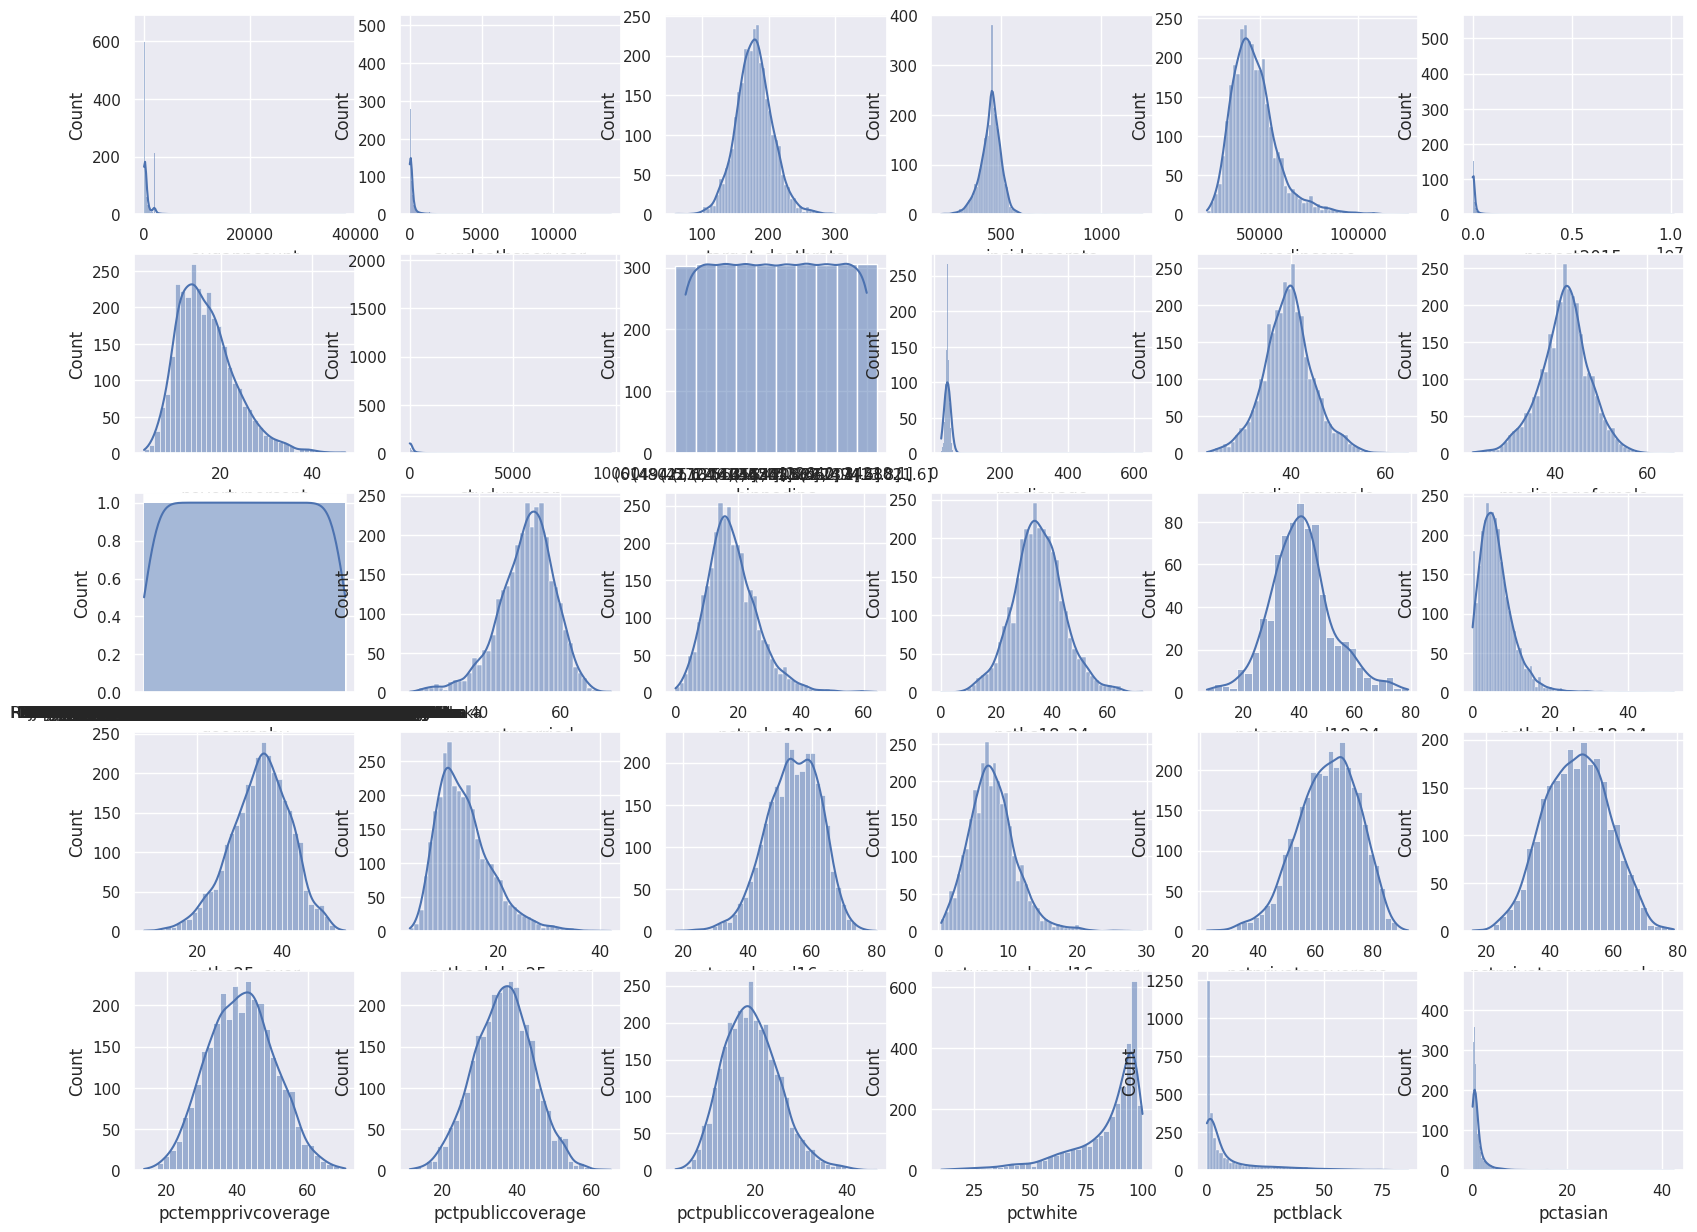

In [27]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in a:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(a[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()


TypeError: ignored

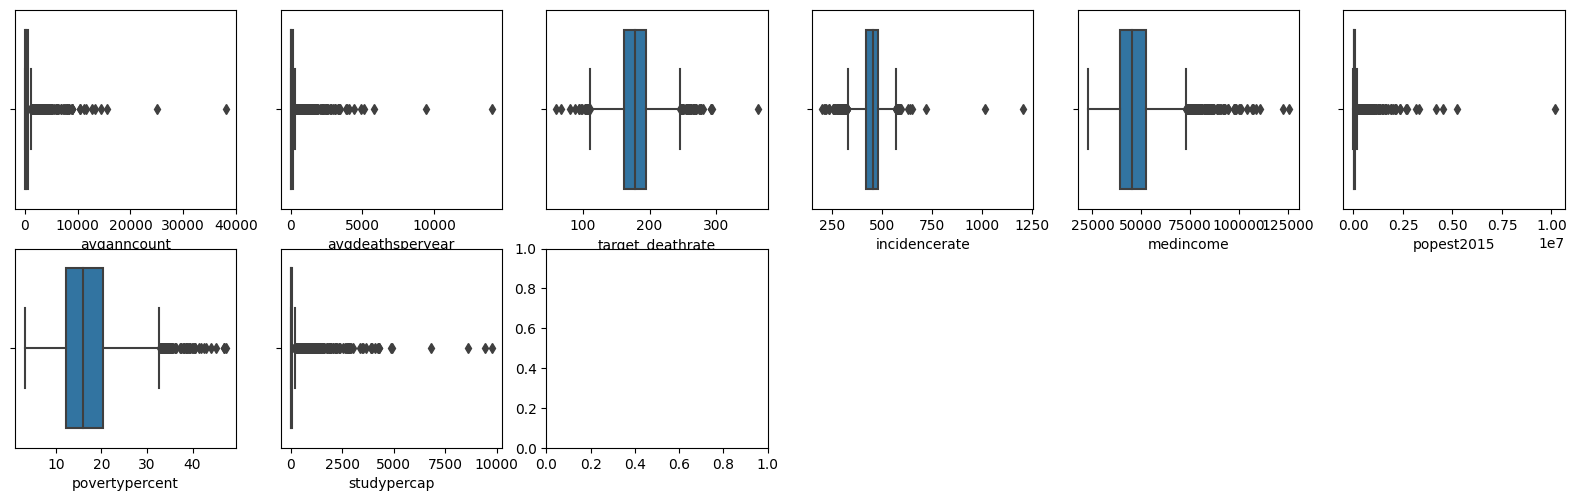

In [8]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in a:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(x=a[column])
        plt.xlabel(column)
       
    plotnumber += 1
plt.title("Distribution")
plt.show()


<Axes: >

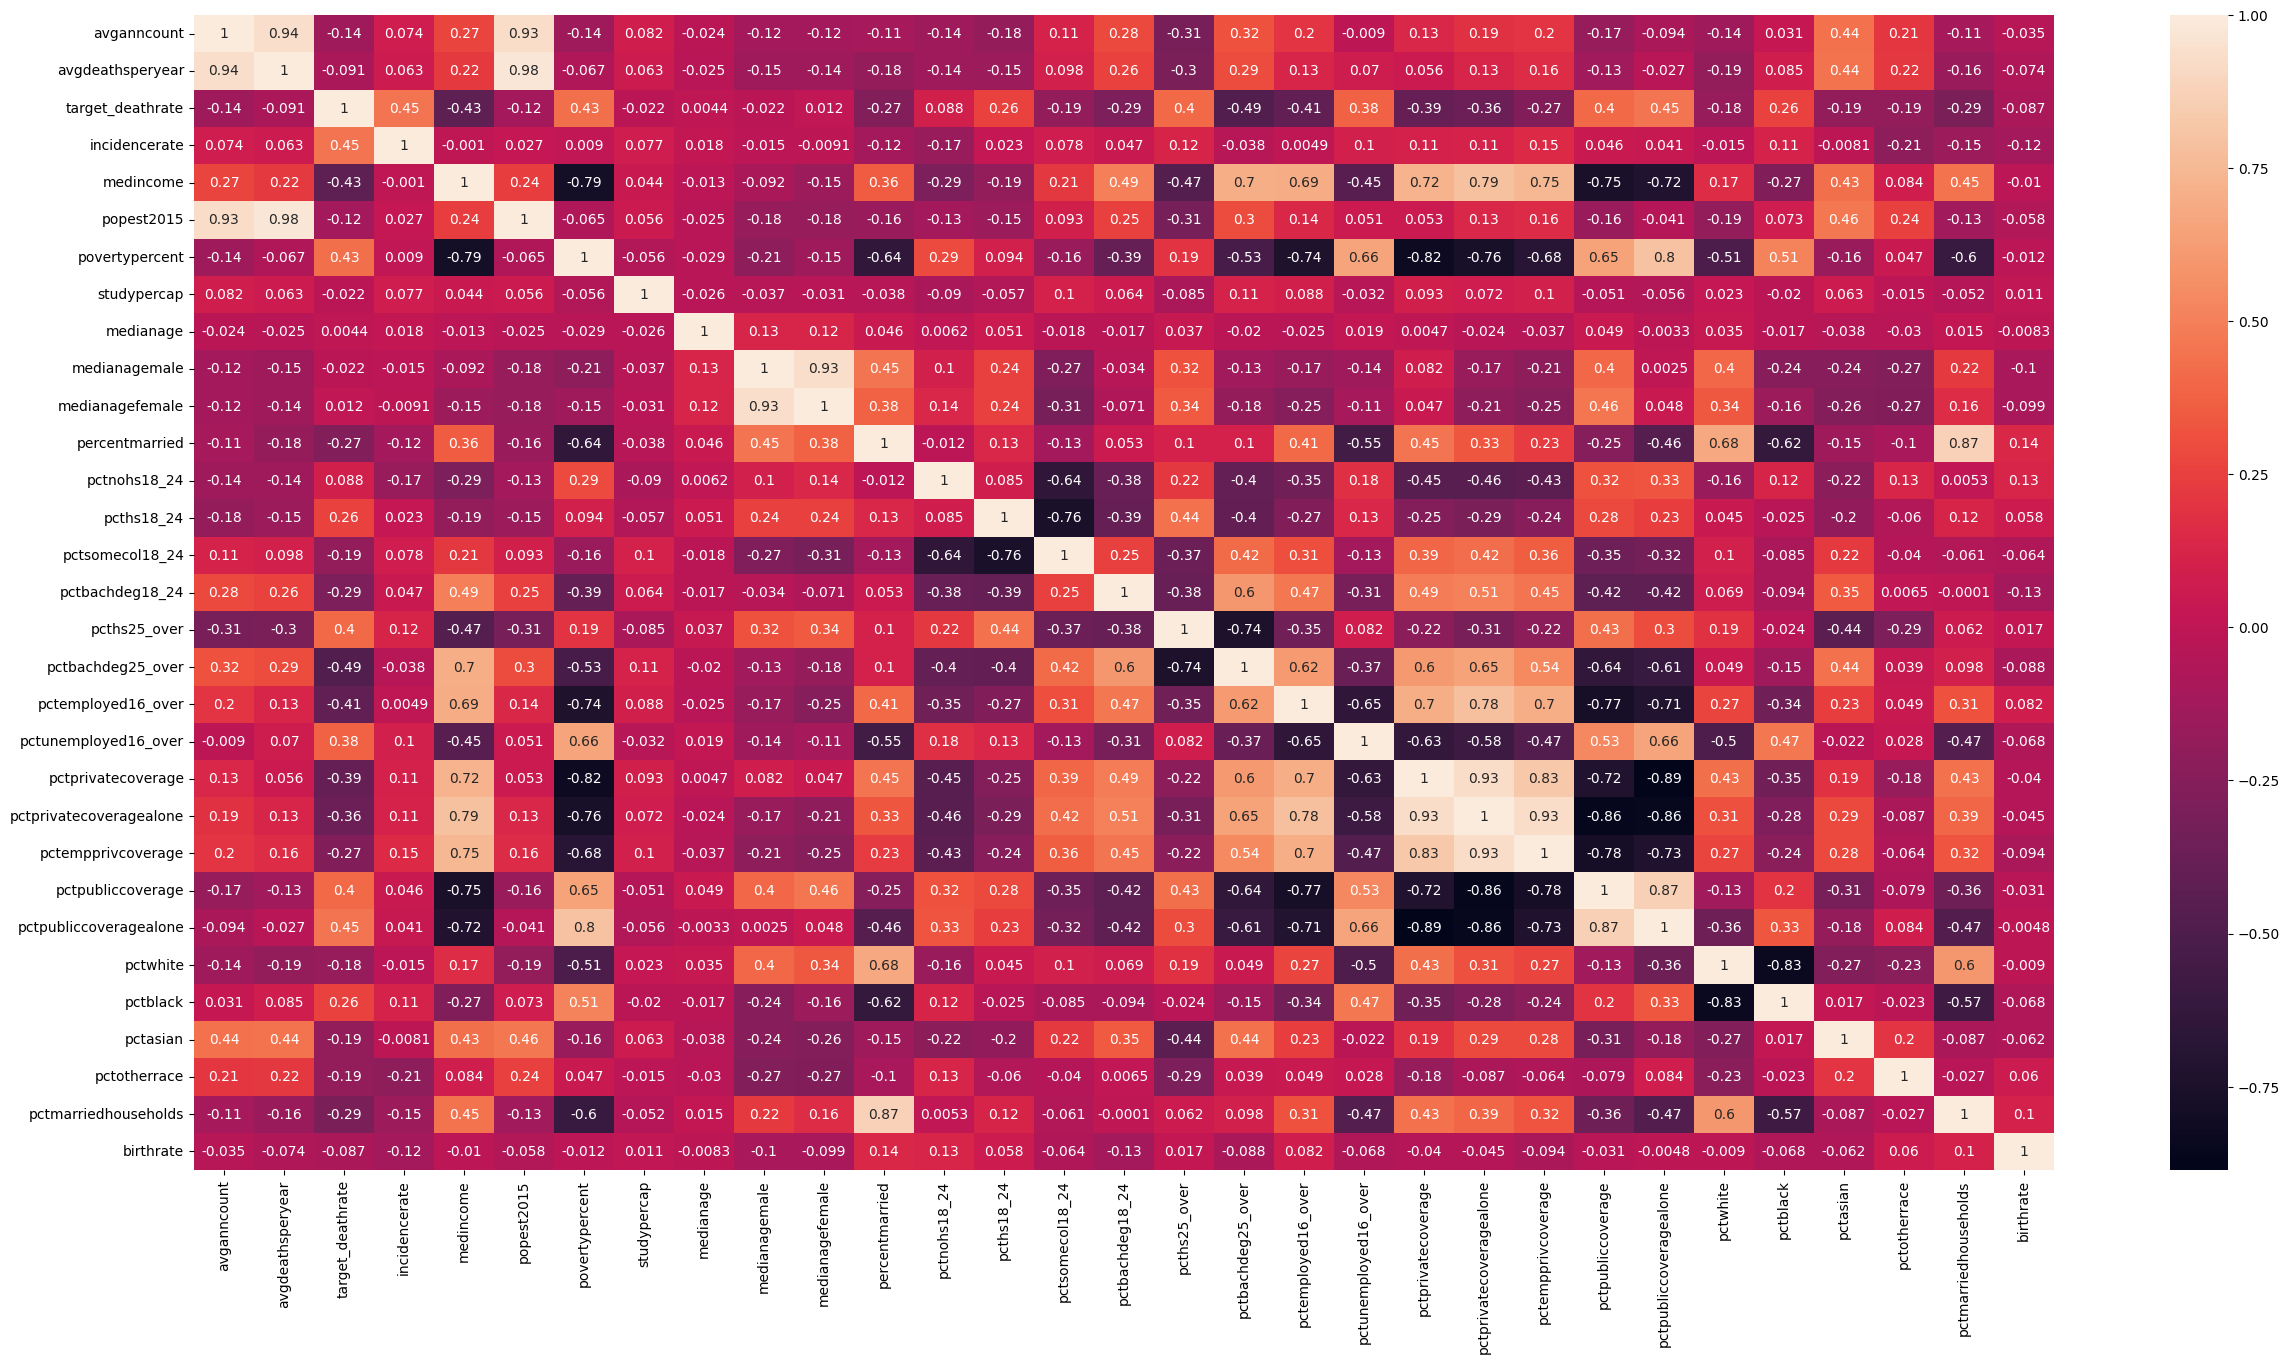

In [9]:
plt.figure(figsize = (30, 15))
sns.heatmap(a.corr(),annot=True)